# Chapter 2: From Observation to Intervention 

The ultimate aim of many statistical studies is to predict the effects of interventions. 
For example, when we collect data on factors associated with wildfires, we look for something we can intervene in to decrease wildfire frequency. 
When we perform a study on a new cancer drug, we try to identify how a patient’s illness responds when we intervene upon it by medicating the patient.  

For this reason, the **randomized controlled experiment** is considered the golden standard of statistics. All factors influencing the outcome variable are static or random in a randomized controlled experiment, except for one. So any change in the outcome variable must be due to that one input variable. Unfortunately, <font color='red'>randomized controlled experiments are not possible in many real-world problems</font>. 
For example, we cannot control the weather, so we can’t randomize the variables that affect wildfires. Even randomized drug trials can run into problems when participants drop out, fail to take their medication, or misreport their usage. 

<font color='red'>In cases where randomized controlled experiments are not practical, researchers instead perform **observational studies**</font>, in which they record data rather than control it. The problem with such studies is that it is difficult to untangle the causal from the correlative. Consider spurious correlation example of the correlation between an increase in ice cream sales with an increase in violent crime. Our common sense tells us that intervening in ice cream sales is unlikely to affect crime, but the facts are not always so clear. 

<br/><br/>
So, what is the difference between **intervening on a variable** and **conditioning on that variable** [(ref)](http://bayes.cs.ucla.edu/PRIMER/ch3-preview.pdf)?

* When we **intervene on a variable** in a model, we fix its value. We change the system, and the values of other variables often change as a result.

* When we **condition on a variable**, we change nothing; we just narrow our focus to the subset of cases in which the variable takes the value we are interested in. In other words, our perception of the world will change, not the world itself.


<br/><br/>
## Different Conditional Queries (Distributions)  

We have i.i.d. data sampled from some joint distribution $p(x,y,z,…)$. Let's assume we have lots of data and the best tools (say, deep networks) to fully estimate this joint distribution or any property, conditional or marginal distribution. In other words, we assume $p$ is known and tractable. Our goal is to know how variable $y$ behaves given $x$. 

At a high level, one can ask this question in three ways:

* **Observational** query $p(y|x)$
* **Interventional** query $p(y|do(x))$
* **Counterfactual** query $p(y|do(X=x'))$

<br/><br/>
#### Observational Queries

* Observational query $p(y|x)$ is the distribution of $Y$ given that we observe variable $X$ takes value $x$.

* It is a conditional distribution which can be calculated from $p(x,y,z,…)$ as a ratio of two of its marginals  $p(y|x)=p(x,y)/p(x)$ . We're all very familiar with this object and know how to estimate this from data.

* This is what we usually estimate in supervised machine learning.

In other words, we have observed $X=x$. Then we ask what is the probability of $Y$?

<br/><br/>
#### Interventional Queries

* Interventional $p(y|do(x))$ is the distribution of $Y$ if we were to set the value of $X$ to $x$.

* This describes the distribution of  $Y$  that we would observe if we intervened in the data generating process by artificially forcing the variable $X$ to take value  $x$.

* $p(y|do(x))$ is the conditional distribution we would learn from data collected in randomized controlled trials or A/B tests where the experimenter controls $x$.

* Note that carrying out the intervention or randomized trials may be impossible or at least impractical or unethical in many situations.

In other words, we set (manipulate) the value $X=x$. Then, we ask what is the probability of $Y$?

<br/><br/>
#### Counterfactuall Queries

* Interventional  $p(y|do(X=x'))$ is the distribution of $Y$ if we were to set the value of $X$ to $x'$ with new distribution generated by a mutilated causal model. 

* A causal graph encodes which variables have a direct causal effect on any given node - we call these causal parents of the node. 

* By mutilating a causal graph, we are making a different world with a different story. We make a twin for our story with some changes. Then, we make a prediction about features of the unobserved twin dataset based on features of the observed dataset.

In other words, we have observed $X=x$ and $Y=y$. Then, we ask what would have been the probability of observing $Y=y'$ if we had observed $X=x'$ instead of $X=x$ ?


![img](img/ch2/Exp_Intervention.png)   


<br/><br/>
### What exactly is an interventional query $p(y|do(x))$ ? 


***If we can not measure $p(y|do(x))$ directly in a randomized controlled trial, can we estimate it based on data we observed outside of a controlled experiment?***


* We are interested in predicting $y$ from $x$ and say that $z$ is a third variable which we do not want to infer but we can also measure. 

* The observational conditional  $p(y|x)$ is calculated from the observable joint dist via a simple conditioning. 

* From the training data generated by the observable joint dist, we can build a model $q(y|x;Θ)$ to approximate this conditional distribution (blue color), for example using a deep learning or etc.

![img](img/ch2/Intervention_1.png)  
<br/><br/>

* We're interested in $p(y|do(x))$ (red color) rather than $p(y|x)$ (blue color).
* We still have the blue observed joint dist and data is still sampled from this joint dist.
* We need a new dist over same the domain of p but hold (control) $x$.



![img](img/ch2/Intervention_2.png)  
<br/><br/>

***How can data generated from blue dist create the red dist?***

***Can we sample the observational (blue) joint distribution, so we can create a data set to make an interventional (red) joint distribution?***


<font color='red'>It is possible but it is complicated, we need some additional assumptions!</font>

![img](img/ch2/Intervention_3.png)  
<br/><br/>


### Causal Models bridge observational data and interventional distributions

* If we want to connect observational and interventional joint distributions (the blue and the red joints dist), we must introduce additional assumptions about the causal structure of the data generating mechanism. 

* In other words, we can only predict how our distribution changes due to intervention by knowing how the variables are causally related. <font color='red'>We need domain expertise to make a causal model.</font>

* Once we have a causal diagram, <font color='red'>we can emulate the effect of intervention by mutilating the causal network</font>. We delete all edges that lead into nodes in a do operator (the middle-top panel). 

* The mutilated causal model then gives rise to a joint distribution denoted by the green factor graph. This joint has a corresponding conditional distribution $p̃(y|do(x))$, which we can use as our approximation of $p(y|do(x))$. 

* If we got the causal structure qualitatively right (i.e. there are no missing nodes, and we got the direction of arrows all correct), this approximation is exact and $p̃(y|do(x))=p(y|do(x))$.

![img](img/ch2/Intervention_4.png)  
<br/><br/>


### Wrap-up on Observations to Intervention

![img](img/ch2/Observation_Intervention.png)  


<br/><br/>
## Using Tablets in School, an Example for Causal Modeling

Some people think that schools that give tablets to their students perform better than those that don't. You can quickly point out that it is probably the case that those schools with tablets are wealthier. As such, they would do better than average even without the tablets. Because of this, we can't conclude that giving tablets to kids during classes will cause an increase in their educational performance. We can only say that tablets in school are associated with high academic performance.

We look at a selected dataset from **Brazilian High School National Exam (ENEM)** scores for schools that use or use not tablets. We got this exmaple from  Matheus Facure Alve book, [Causal Inference for The Brave and True](https://matheusfacure.github.io/python-causality-handbook/landing-page.html).

In this example, we learn about three tools for causal inference:

- Individual Treatment Effect (TE)
- Average Treatment Effect (ATE)
- Average Treatment Effect on the Treated (ATT)


![img](img/ch2/Kids_Tablets.jpeg)   

In [ ]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

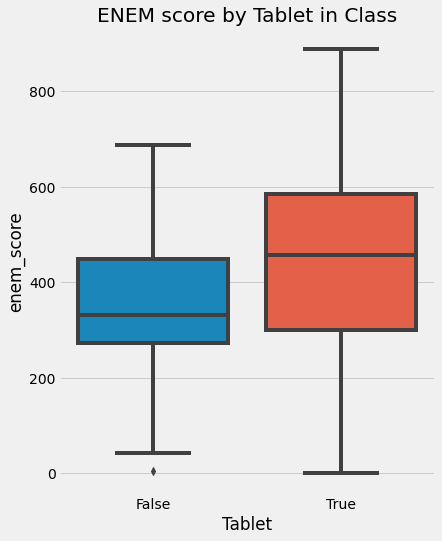

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

First, we establish some notation as our common language to speak about causal models. 

* Let's call $T_i$ the **treatment** intake for unit $i$. The **treatment** here doesn't need to be medicine or anything from the medical field. Instead, it is just a term we will use to denote some intervention we want to know the effect.  

$
T_i=\begin{cases}
1 \ \text{if unit i received the treatment}\\
0 \ \text{otherwise}\\
\end{cases}
$

<br/>

* Let's call $Y_i$ the observed outcome variable for unit $i$. The **outcome** is our variable of interest. We want to know if the treatment has any influence on the outcome.  

> *In our tablet example, the 'treatment' is giving tablets to students, and the 'outcome' would be academic performance*.

<br/>

* The **fundamental problem of causal inference** is that we can never observe the same unit with and without treatment. So we will talk a lot in terms of **potential outcomes**. They are potential because they didn't actually happen. Instead, they denote **what would have happened** if some treatment had been taken. 

<br/>

* We sometimes call the potential outcome that happened **factual**, and the one that didn't happen **counterfactual**.

<br/>

* In the design of experiments, treatments are applied to experimental units in a **treatment group**. In comparative experiments, members of a **control group** or **untreated group** receive a standard treatment, a placebo, or no treatment at all.

As for the notation, we use an additional subscript:

$Y_{0i}$ is the potential outcome for unit $i$ <font color='red'>without the treatment.</font>

$Y_{1i}$ is the potential outcome for the same unit $i$ <font color='red'>with the treatment.</font>


> *Back to our tablet example, $Y_{1i}$ is the academic performance of student $i$ if he/she is in a classroom with tablets. If student $i$ get the tablet, we can observe $Y_{1i}$. If not, we can observe $Y_{0i}$. Notice how $Y_{1i}$ is still defined; we just can't see it. In this case, it is a potential counterfactual outcome.*

With potential outcomes, we can define the **individual treatment effect (TE)**:

$TE_i = Y_{1i} - Y_{0i}$

<br/>

Due to the fundamental problem of causal inference, we can never know both individual treatment effect because we only observe one of the potential outcomes at each time. So, we focus on something easier than estimating the individual treatment effect. Instead, we calculate the **average treatment effect (ATE)**, which is defined as follows:

$ATE = E[Y_1 - Y_0]$

where, $E[...]$ is the expected value. Another easier quantity to estimate is the **average treatment effect on the treated (ATT)**:

$ATT = E[Y_1 - Y_0 | T=1]$


> *Back to our example, we know we can't see both potential outcomes of having tablets to students or not on scores. But just for the sake of argument, let's suppose we could. With that assumption, we collect data on four schools. We know if those schools gave tablets to thier students and their students' scores on annual academic tests. Here, tablets are the treatment, so $T=1$ if the school gives tablets to its students. $Y$ will be the test score.*

Following table shows the data:

In [ ]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    T= [0,0,1,1],
    y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

i   y0   y1  T    y   TE
0  1  500  450  0  500  -50
1  2  600  600  0  600    0
2  3  800  600  1  600 -200
3  4  700  750  1  750   50

The $ATE$ here would be the mean of the last column, that is, of the treatment effect (TE):

$ATE=(-50 + 0 - 200 + 50)/4 = -50$

This would mean that tablets reduced the academic performance of students, on average, by 50 points. The $ATT$ here would be the mean of the last column when $T=1$:

$ATT=(- 200 + 50)/2 = -75$

This is saying that, for the schools that were treated, the tablets reduced the academic performance of students, on average, by 75 points. Of course we can never know this. In reality, the table above would look like this:

In [ ]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,np.nan,np.nan],
    y1=[np.nan,np.nan,600,750],
    T= [0,0,1,1],
    y= [500,600,600,750],
    TE=[np.nan,np.nan,np.nan,np.nan],
))

i     y0     y1  T    y  TE
0  1  500.0    NaN  0  500 NaN
1  2  600.0    NaN  0  600 NaN
2  3    NaN  600.0  1  600 NaN
3  4    NaN  750.0  1  750 NaN

<br/>

This is not ideal, but can we still take the mean of the treated and compare it to the mean of the untreated? In other words, can we do $ATE=(600+750)/2  - (500 + 600)/2  = 125$ ? 

**No! Notice how different the ATE results are. Why?**
<font color='red'>**Because association is not causation!**</font>


## Bias is what makes Association different from Causation

> Back to our tablets in the classroom example. When we face the claim that schools that give tablets to their kids achieve higher test scores, we can dispute it by saying those schools will probably achieve higher test scores anyway, even without the tablets. Because they probably have more money than the other schools; hence they can pay better teachers, afford better classrooms, and so on. In other words, it is the case that **treated schools** (with tablets) are not comparable with **untreated schools**. 

To say this in potential outcome notation, we say that $Y_0$ of the treated is different from the $Y_0$ of the untreated. Remember that the $Y_0$ of the treated case is **counterfactual**. We can't observe it, but we can reason about it. 

> In our tablet example, we can probably say that $Y_0$ of the treated schools is more than $Y_0$ of the untreated schools. Schools that can afford tablets for their kids can also afford other factors that contribute to better test scores, such as location, teachers, facilities, etc.


With this example in mind, let's see why the association is not causation. 

* Association is measured by $E[Y|T=1] - E[Y|T=0]$. In our example, this is the average test score for the schools with tablets minus the average test score for those without it. 
* On the other hand, causation is measured by $E[Y_1 - Y_0]$.

<br/><br/>
To see how association and causation relate, let's take the association measurement and replace the observed outcomes with the potential outcomes. For the treated case, the observed outcome is $Y_1$. For the untreated, the observed outcome is $Y_0$.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$

Now, let's add and subtract $E[Y_0|T=1]$. This is a counterfactual outcome. It tells what would have been the treated schools' outcome if they did not receive the treatment.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]
$

<br/><br/>
Finally, we reorder the terms, merge some expectations and we have:

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

<br/><br/>
This simple piece of math encompasses all the problems we will encounter in causal questions. Let's break it down into some of its implications. 

* First, this equation tells why the association is not causation. As we can see, the association is equal to the treatment effect on the treated plus a bias term. 

* **The bias is given by how the treated and untreated (control) groups differ before the treatment, in case non of them has received the treatment**. 

> Back to tablets example, we can now say why we are suspicious when someone tells us that having tablets in the classroom boost academic performance. We think that, in this example, $E[Y_0|T=0] < E[Y_0|T=1]$, which means schools that can afford to give tablets to their kids have better performance than those that can't, **regardless of the tablets treatment**.

<br/><br/>
<font color='blue'>**Bias occurs because many things that we can't control will change concurrently with the treatment**.</font>

> Back to tablets example, the treated and untreated schools don't differ only on the tablets. They also differ in the tuition cost, location, teachers, etc. So before saying tablets in the classroom increase academic performance, we would need for schools with and without them to be, on average, similar to each other.

<br/><br/>
<font color='blue'>**The causal inference is all about finding clever ways of removing bias and making the treated and the untreated comparable. All the difference we see between them is only the average treatment effect. Eventually, causal inference is about figuring out how the world works, stripped of all bias and misinterpretations.**</font>

The following scatter plot shows the relationship between school, tuition fees and the national ENEM score.

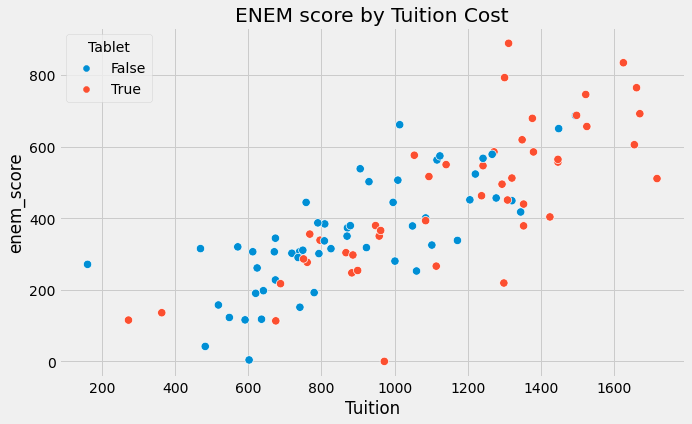

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()

<br/><br/>
## Randomized Experiments, When Association become Causation

In the previous session, we saw why and how association differs from causation. It also gives us an indication of what makes association causation.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

* **Association becomes causation if there is no bias.** There will be no bias if $E[Y_0|T=0] = E[Y_0|T=1]$. 

* In other words, association will be causation if the treated and control (untreated) groups are equal or comparable, except for the treatment they receive. 

* In more technical words, association will be causation when the outcome of the untreated is equal to the counterfactual outcome of the treated. Remember that this counterfactual outcome is the outcome of the treated group if they had not received the treatment.

<br/><br/>
<font color='red'>**How to make association equal to causation in reality?**</font>

**Randomised Experiments** or **Randomised Controlled Trials (RCT)** is the first tool we have to make the bias vanish. 
* Randomised experiments randomly assign individuals in a population to a treatment or a control group.

* Randomisation annihilates bias by making the potential outcomes independent of the treatment.

$
(Y_0, Y_1) \perp\!\!\!\perp T
$

* Notice, here we are talking about **potential** outcomes instead of outcomes. The potential outcome is how the outcome **would have been** under treatment ($Y_1$) or under control ($Y_0$). 

* In randomized trials, we don't want the outcome to be **independent** of the treatment since we think **the treatment causes** the outcome. 

* But we want the **potential outcomes** to be independent of the treatment. In simpler terms, knowing the treatment assignment doesn't give me any information on how the outcome was previous to the treatment. 

<br/><br/>
Consequently, $(Y_0, Y_1) \perp\!\!\!\perp T$ means that the treatment is the only thing generating a difference between the outcome in the treated and untreated (control) groups. 

To see this, notice that independence means that

$
E[Y_0|T=0]=E[Y_0|T=1]=E[Y_0]
$

which, as we've seen, makes it so that

$
E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0]=ATE
$

<br/><br/>
So, randomization gives us a way to use a simple difference in means between treatment and nontreatment, and we call it the **average treatment effect (ATE)**.


<br/><br/>
## Online Schools in COVID Time, an example for Randomised Experiments to uncover causal effects

The COVID-19 pandemic has disrupted education in over 150 countries. The education response during the early phase of COVID-19 focused on implementing remote learning modalities as an emergency response. These were intended to reach all students but were not always successful. As a result, schools are now partially or fully open in many countries. Some research suggests that online learning has caused a significant impact on kids learning performance. However, online learning has its supporters or opponents. **We still need to answer if online learning negatively or positively affects students' academic performance.**

<br/><br/>
One way to answer this is to take students from schools that give mostly online classes and compare them with students from schools that provide lectures in traditional classrooms. 

* **Positive Bias**:We may think that online schools attract only the well-disciplined students that do better than average even if the class were presential. In this case, we would have a *positive bias*, where the treated are academically better than the untreated: 

$$
E[Y_0|T=1] > E[Y_0|T=0]
$$


* **Negative Bias:** we may think that online classes are cheaper and are mainly composed of less wealthy students. These low-income students would do worse than those from the presential schools even if they took presential classes. In this case, we would have a *negative bias*, where the treated are academically worse than the untreated:  

$$
E[Y_0|T=1] < E[Y_0|T=0]
$$


* One way or another, we could never be sure if there wasn't any bias lurking around and masking our causal effect. So to solve the bias problem, we need to make the treated and untreated groups comparable 

$$
E[Y_0|T=1] = E[Y_0|T=0]
$$

<br/><br/>
<font color='red'>One way to force this is by randomly assigning the online and presential classes to students</font>. If we managed to do that, the treatment and untreated would be, on average, the same, except for the treatment they receive. 


Fortunately, there is a [study](https://matheusfacure.github.io/python-causality-handbook/02-Randomised-Experiments.html) that is based on randomized classes so that some students were assigned to have face-to-face lectures, others to have only online lectures, and a third group to have a blended format of both online and face-to-face lectures. They collected data on a standard exam at the end of the semester for 323 students. Here is what the data looks like:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/online_classroom.csv")
print(data.shape)
data.head()

(323, 10)


gender  asian  black  hawaiian  hispanic  unknown  white  format_ol  \
0       0    0.0    0.0       0.0       0.0      0.0    1.0          0   
1       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
2       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
3       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
4       1    0.0    0.0       0.0       0.0      0.0    1.0          1   

   format_blended  falsexam  
0             0.0  63.29997  
1             0.0  79.96000  
2             1.0  83.37000  
3             1.0  90.01994  
4             0.0  83.30000

In [ ]:
(data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())

gender     asian     black  hawaiian  hispanic   unknown  \
class_format                                                               
blended       0.550459  0.217949  0.102564  0.025641  0.012821  0.012821   
face_to_face  0.633333  0.202020  0.070707  0.000000  0.010101  0.000000   
online        0.542553  0.228571  0.028571  0.014286  0.028571  0.000000   

                 white  format_ol  format_blended   falsexam  
class_format                                                  
blended       0.628205        0.0             1.0  77.093731  
face_to_face  0.717172        0.0             0.0  78.547485  
online        0.700000        1.0             0.0  73.635263

<br/>

* The study shows that face-to-face classes yield a 78.54 average score, while online classes yield a 73.63 average score. It is not so good news for the supporters of online learning!

<br/>

* The $ATE$ for online classes is -4.91. It means that **online classes cause students to perform about 5 points lower**, on average. 

<br/>

* A good sanity check to see if the randomization was done right is to check if the treated group is equal to the untreated group in pre-treatment variables. In our data, we have information on gender and ethnicity to see if they are equal across groups. For the `gender`, `asian`, `hispanic` and `white` variables, we can say that they look pretty similar. 

<br/><br/>

## Some Words on Mechanisms for Randomised Experiments

* In a randomized experiment, the mechanism that assigns units to one treatment or the other shall be random. 

* The assignment mechanism can't be discovered by simply looking at the data. 

* We will have to use our domain knowledge to argue for a plausible assignment mechanism.

* In causal questions, we can argue in both ways: that X causes Y, or that it is a third variable Z that causes both X and Y, and hence the X and Y correlation is just spurious. 

* All causal inference techniques will somehow try to identify the assignment mechanisms of the treatments. Causal inference requires us to think about the mechanism generating that data. 


## References

This chapter contents are highly inspired by the open-source book on causality by Matheus Facure Alves.

* [Causal Inference for The Brave and True](https://matheusfacure.github.io/python-causality-handbook/landing-page.html)

We also acknowledge the Causal Inference Book by Miguel Hernan and Jamie Robins.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)